In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path="/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train"
train_image_path="/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train"
valid_image_path="/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/valid"
test_image_path="/content/drive/MyDrive/data/test"

In [3]:
name_class = os.listdir(file_path)
name_class

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Cherry_(including_sour)___healthy',
 'Grape___Black_rot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Blueberry___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Grape___healthy',
 'Grape___Esca_(Black_Measles)',
 'Peach___Bacterial_spot',
 'Potato___healthy',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Pepper,_bell___Bacterial_spot',
 'Peach___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Soybean___healthy',
 'Tomato___Early_blight',
 'Squash___Powdery_mildew',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Toma

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/data/Plant Diseases Dat...,"Pepper,_bell___Bacterial_spot"
1,/content/drive/MyDrive/data/Plant Diseases Dat...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
2,/content/drive/MyDrive/data/Plant Diseases Dat...,Potato___Early_blight
3,/content/drive/MyDrive/data/Plant Diseases Dat...,Tomato___Target_Spot
4,/content/drive/MyDrive/data/Plant Diseases Dat...,Grape___Esca_(Black_Measles)


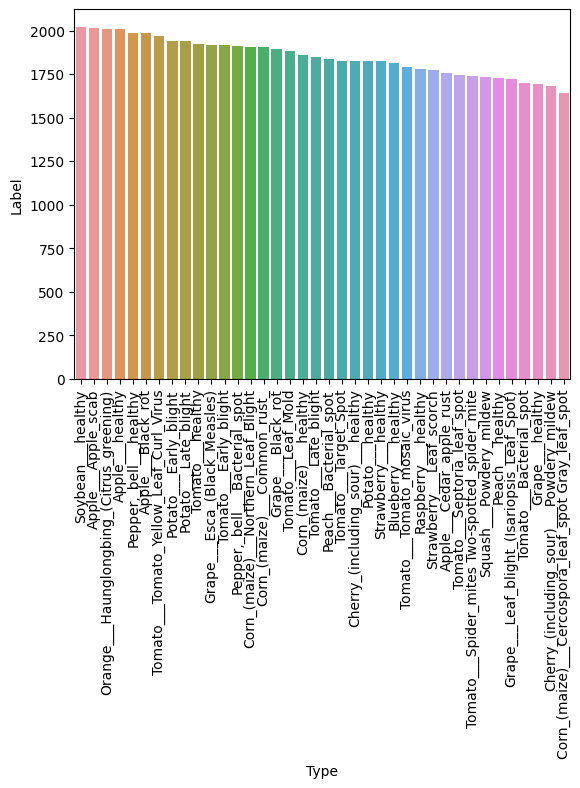

In [6]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [8]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

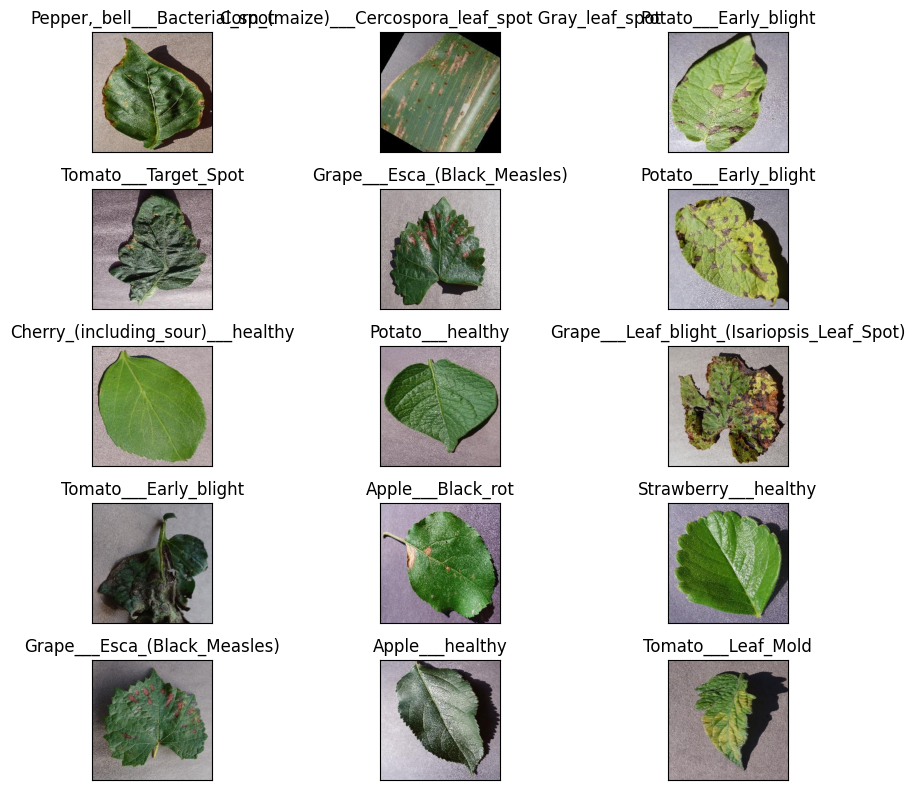

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [9]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [10]:
train_gen = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train", target_size=(256,256),batch_size=32)
val_gen = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/valid", target_size=(256,256),batch_size=32)

Found 70312 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [11]:
pretrained_model = ResNet50(
    input_shape=(256,256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [12]:
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [13]:
inputs = pretrained_model.input

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dense(256, activation='relu')(x)

outputs = Dense(38, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [15]:
import keras
model.compile(
    optimizer='adam',
    loss= keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

es= EarlyStopping(monitor='val_accuracy',
                              min_delta=0.01,
                              patience=3,
                               verbose =1)

mc= ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    min_delta = 0.01,
                    patience = 3,
                    verbose =1,
                    save_best_only = True)
cb = [es,mc]

In [17]:
history = model.fit(
    train_gen,
    steps_per_epoch=16,
    validation_data=val_gen,
    epochs=10,
    verbose =1,
    callbacks= cb,
    validation_steps=16
)

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 3.4042 - accuracy: 0.1367
Epoch 1: val_accuracy improved from -inf to 0.31055, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 264s 17s/step - loss: 3.4042 - accuracy: 0.1367 - val_loss: 2.9705 - val_accuracy: 0.3105
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 2.4688 - accuracy: 0.3633
Epoch 2: val_accuracy improved from 0.31055 to 0.50195, saving model to best_model.h5
16/16 [==============================] - 256s 16s/step - loss: 2.4688 - accuracy: 0.3633 - val_loss: 1.8998 - val_accuracy: 0.5020
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 1.7464 - accuracy: 0.5195
Epoch 3: val_accuracy improved from 0.50195 to 0.62109, saving model to best_model.h5
16/16 [==============================] - 252s 16s/step - loss: 1.7464 - accuracy: 0.5195 - val_loss: 1.4006 - val_accuracy: 0.6211
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 1.2412 - accuracy: 0.6621
Epoch 4: val_accuracy improved from 0.62109 to 0.74023, saving model to best_model.h5
16/16 [==============================] - 250s 16s/step - loss: 1.24

In [18]:
h=history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

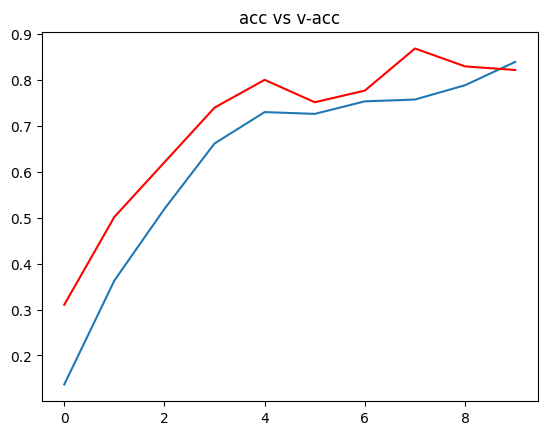

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("acc vs v-acc")
plt.show()

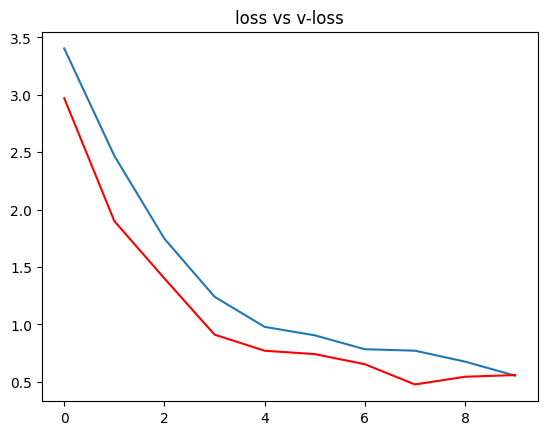

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")
plt.title("loss vs v-loss")
plt.show()

In [21]:
#load best model

from keras.models import load_model
model = load_model("/content/best_model.h5")

In [22]:
#from keras.models import load_model
model = load_model("/content/best_model.h5")

In [23]:
ref = dict(zip(list(train_gen.class_indices.values()),list(train_gen.class_indices.keys())))
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [24]:
def prediction(path):
  img = load_img(path, target_size= (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis =0)
  pred =np.argmax(model.predict(img))
  print(f" the image belongs to {ref[pred]}")

In [26]:
from tensorflow.keras.preprocessing.image import load_img,  img_to_array

path = "/content/drive/MyDrive/data/test/test/PotatoEarlyBlight1.JPG"
prediction(path)

1/1 [==============================] - 0s 160ms/step
 the image belongs to Potato___Early_blight


In [27]:
path = "/content/drive/MyDrive/data/test/test/TomatoYellowCurlVirus3.JPG"
prediction(path)

1/1 [==============================] - 0s 159ms/step
 the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [28]:
path = "/content/drive/MyDrive/data/test/test/PotatoHealthy1.JPG"
prediction(path)

1/1 [==============================] - 0s 151ms/step
 the image belongs to Potato___healthy


In [29]:
path = "/content/drive/MyDrive/data/test/test/TomatoEarlyBlight3.JPG"
prediction(path)

1/1 [==============================] - 0s 156ms/step
 the image belongs to Tomato___Target_Spot


In [30]:
path = "/content/drive/MyDrive/data/test/test/AppleScab2.JPG"
prediction(path)

1/1 [==============================] - 0s 214ms/step
 the image belongs to Apple___Apple_scab


In [32]:
acc = model.evaluate_generator(val_gen)[1]
print ( f" The accuracy of your model is {acc*100} %")

<ipython-input-32-9bb45fdd7f5e>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val_gen)[1]


 The accuracy of your model is 85.44843792915344 %
